In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('sat.trn',header=None,sep = '\s')

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = len(numbers)

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 4435
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 100)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
winner_list = []
classes = [[4,5],[2,3],[1,3,5]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1508
number of class2:2927

 ****** Running generation 0 ****** 

Population's average fitness: 0.57957 stdev: 0.13312
Best fitness: 0.74047 - size: (2, 7) - species 7 - id 163
Average adjusted fitness: 0.272
Mean genetic distance 2.833, standard deviation 0.437
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 12.626 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56613 stdev: 0.14090
Best fitness: 0.74047 - size: (2, 7) - species 7 - id 163
Average adjusted fitness: 0.289
Mean genetic distance 2.893, standard deviation 0.475
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 14.765 sec (13.695 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58860 stdev: 0.12637
Best fitness: 0.74047 - size: (2, 7) - species 34 - id 163
Average adjusted fitness: 0.308
Mean genetic distance 2.876, standard deviation 0.487
Population of 202 members in 37 species
Total extinc

Population's average fitness: 0.60819 stdev: 0.12843
Best fitness: 0.79346 - size: (6, 14) - species 31 - id 1093
Average adjusted fitness: 0.267
Mean genetic distance 2.983, standard deviation 0.560
Population of 207 members in 23 species
Total extinctions: 0
Generation time: 14.961 sec (14.755 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.59081 stdev: 0.13853
Best fitness: 0.79346 - size: (6, 14) - species 31 - id 1093
Average adjusted fitness: 0.307
Mean genetic distance 2.960, standard deviation 0.558
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 15.720 sec (14.928 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.57853 stdev: 0.14774
Best fitness: 0.79346 - size: (6, 14) - species 31 - id 1093
Average adjusted fitness: 0.258
Mean genetic distance 2.979, standard deviation 0.560
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 14.880 sec (14.974 average)

 

Population's average fitness: 0.55701 stdev: 0.15633
Best fitness: 0.81105 - size: (6, 13) - species 31 - id 5147
Average adjusted fitness: 0.215
Mean genetic distance 3.101, standard deviation 0.574
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 18.874 sec (18.437 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.57591 stdev: 0.14721
Best fitness: 0.81105 - size: (6, 13) - species 31 - id 5147
Average adjusted fitness: 0.247
Mean genetic distance 3.054, standard deviation 0.572
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 18.871 sec (18.571 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.58971 stdev: 0.14449
Best fitness: 0.82593 - size: (4, 10) - species 24 - id 7615
Average adjusted fitness: 0.293
Mean genetic distance 3.008, standard deviation 0.582
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 19.873 sec (18.824 average)

 

Population's average fitness: 0.58474 stdev: 0.13861
Best fitness: 0.82593 - size: (4, 10) - species 24 - id 7615
Average adjusted fitness: 0.250
Mean genetic distance 3.001, standard deviation 0.565
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 21.988 sec (20.575 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.60100 stdev: 0.12943
Best fitness: 0.82593 - size: (4, 10) - species 24 - id 7615
Average adjusted fitness: 0.291
Mean genetic distance 3.056, standard deviation 0.565
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 25.047 sec (20.493 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.58554 stdev: 0.14035
Best fitness: 0.82593 - size: (4, 10) - species 24 - id 7615
Average adjusted fitness: 0.248
Mean genetic distance 3.061, standard deviation 0.567
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 20.883 sec (20.607 average)

 

Population of 194 members in 20 species
Total extinctions: 0
Generation time: 19.056 sec (19.570 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.58605 stdev: 0.14788
Best fitness: 0.82593 - size: (4, 10) - species 24 - id 7615
Average adjusted fitness: 0.246
Mean genetic distance 3.120, standard deviation 0.594
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 18.537 sec (19.503 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.59277 stdev: 0.14723
Best fitness: 0.82593 - size: (4, 10) - species 24 - id 7615
Average adjusted fitness: 0.313
Mean genetic distance 3.108, standard deviation 0.595
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 21.183 sec (19.674 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.58342 stdev: 0.14992
Best fitness: 0.82593 - size: (4, 10) - species 24 - id 7615
Average adjusted fitness: 0.266
Mean genetic dis

Population's average fitness: 0.63369 stdev: 0.12521
Best fitness: 0.71860 - size: (4, 10) - species 30 - id 1602
Average adjusted fitness: 0.315
Mean genetic distance 2.985, standard deviation 0.568
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 16.781 sec (15.535 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.63648 stdev: 0.12005
Best fitness: 0.72559 - size: (4, 10) - species 31 - id 3513
Average adjusted fitness: 0.332
Mean genetic distance 2.933, standard deviation 0.559
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 16.323 sec (15.670 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60119 stdev: 0.15517
Best fitness: 0.72559 - size: (4, 10) - species 31 - id 3513
Average adjusted fitness: 0.287
Mean genetic distance 2.930, standard deviation 0.554
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 13.341 sec (15.482 average)

 

Population's average fitness: 0.61434 stdev: 0.14124
Best fitness: 0.73145 - size: (6, 12) - species 44 - id 6359
Average adjusted fitness: 0.305
Mean genetic distance 3.052, standard deviation 0.528
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 18.623 sec (17.326 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.61620 stdev: 0.14052
Best fitness: 0.73145 - size: (6, 12) - species 44 - id 6359
Average adjusted fitness: 0.306
Mean genetic distance 3.070, standard deviation 0.527
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 18.503 sec (17.327 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.63138 stdev: 0.13132
Best fitness: 0.73145 - size: (6, 12) - species 44 - id 6359
Average adjusted fitness: 0.340
Mean genetic distance 3.091, standard deviation 0.534
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 18.284 sec (17.670 average)

 

Population's average fitness: 0.61009 stdev: 0.14696
Best fitness: 0.73484 - size: (8, 17) - species 52 - id 9463
Average adjusted fitness: 0.302
Mean genetic distance 3.109, standard deviation 0.612
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 18.697 sec (20.964 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.61302 stdev: 0.14286
Best fitness: 0.73957 - size: (7, 14) - species 44 - id 11522
Average adjusted fitness: 0.304
Mean genetic distance 3.149, standard deviation 0.578
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 20.772 sec (21.258 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.61434 stdev: 0.14261
Best fitness: 0.73957 - size: (7, 14) - species 44 - id 11522
Average adjusted fitness: 0.312
Mean genetic distance 3.145, standard deviation 0.573
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 22.164 sec (21.482 average)


Population's average fitness: 0.60472 stdev: 0.15061
Best fitness: 0.74115 - size: (14, 30) - species 76 - id 14453
Average adjusted fitness: 0.293
Mean genetic distance 3.155, standard deviation 0.582
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 24.339 sec (21.707 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.61956 stdev: 0.14085
Best fitness: 0.74115 - size: (14, 30) - species 76 - id 14453
Average adjusted fitness: 0.310
Mean genetic distance 3.193, standard deviation 0.597
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 22.756 sec (21.372 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.61921 stdev: 0.14204
Best fitness: 0.74115 - size: (14, 30) - species 76 - id 14453
Average adjusted fitness: 0.332
Mean genetic distance 3.206, standard deviation 0.591
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 22.119 sec (21.635 avera

Population's average fitness: 0.56160 stdev: 0.08933
Best fitness: 0.74092 - size: (3, 10) - species 8 - id 1808
Average adjusted fitness: 0.214
Mean genetic distance 3.057, standard deviation 0.552
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 14.425 sec (14.624 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.55701 stdev: 0.09178
Best fitness: 0.74092 - size: (3, 10) - species 8 - id 1808
Average adjusted fitness: 0.242
Mean genetic distance 3.096, standard deviation 0.552
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 15.638 sec (14.669 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.55142 stdev: 0.09258
Best fitness: 0.74092 - size: (3, 10) - species 8 - id 1808
Average adjusted fitness: 0.204
Mean genetic distance 3.045, standard deviation 0.545
Population of 207 members in 20 species
Total extinctions: 0
Generation time: 14.911 sec (14.658 average)

 ***


 ****** Running generation 42 ****** 

Population's average fitness: 0.56652 stdev: 0.09075
Best fitness: 0.74092 - size: (3, 10) - species 8 - id 1808
Average adjusted fitness: 0.213
Mean genetic distance 3.077, standard deviation 0.565
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 16.658 sec (16.664 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.55832 stdev: 0.09125
Best fitness: 0.74092 - size: (3, 10) - species 8 - id 1808
Average adjusted fitness: 0.235
Mean genetic distance 3.066, standard deviation 0.581
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 16.620 sec (16.700 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.55607 stdev: 0.09328
Best fitness: 0.74092 - size: (3, 10) - species 8 - id 1808
Average adjusted fitness: 0.204
Mean genetic distance 3.061, standard deviation 0.570
Population of 197 members in 18 species
Total extinctions: 0
Generation

Population's average fitness: 0.55448 stdev: 0.08850
Best fitness: 0.74746 - size: (8, 22) - species 22 - id 8115
Average adjusted fitness: 0.203
Mean genetic distance 2.983, standard deviation 0.610
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 16.458 sec (18.576 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.54958 stdev: 0.09321
Best fitness: 0.74746 - size: (8, 22) - species 22 - id 8115
Average adjusted fitness: 0.213
Mean genetic distance 2.965, standard deviation 0.589
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 16.757 sec (18.550 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.54292 stdev: 0.09724
Best fitness: 0.74746 - size: (8, 22) - species 22 - id 8115
Average adjusted fitness: 0.200
Mean genetic distance 2.963, standard deviation 0.595
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 17.008 sec (18.387 average)

 

Population's average fitness: 0.55771 stdev: 0.09661
Best fitness: 0.74814 - size: (10, 23) - species 46 - id 13593
Average adjusted fitness: 0.210
Mean genetic distance 3.160, standard deviation 0.637
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 21.215 sec (20.889 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.55286 stdev: 0.09737
Best fitness: 0.74814 - size: (10, 23) - species 46 - id 13593
Average adjusted fitness: 0.204
Mean genetic distance 3.248, standard deviation 0.604
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 20.894 sec (20.830 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.54860 stdev: 0.09775
Best fitness: 0.75310 - size: (8, 22) - species 22 - id 15277
Average adjusted fitness: 0.200
Mean genetic distance 3.265, standard deviation 0.583
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 22.815 sec (21.108 averag

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
test_df = pd.read_csv('sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [9]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [10]:
number_codes = [[0, 0, 0],
[0, 0, 1],
[0, 1, 0],
[0, 1, 1],
[1, 0, 0],
[1, 0, 1]]

In [11]:
pred_value = []
error_list = []

for j in range(2000):
    pred = []
    for i in range(3):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(6):
        error.append(3 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [12]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == testy)/2000

0.4895

In [13]:
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], testy[i]))

#0 min_error:0 index:[2] real:2
#1 min_error:0 index:[2] real:2
#2 min_error:0 index:[2] real:3
#3 min_error:0 index:[2] real:3
#4 min_error:0 index:[0] real:3
#5 min_error:0 index:[2] real:3
#6 min_error:0 index:[2] real:3
#7 min_error:0 index:[1] real:3
#8 min_error:0 index:[2] real:3
#9 min_error:0 index:[4] real:3
#10 min_error:0 index:[4] real:3
#11 min_error:0 index:[4] real:3
#12 min_error:0 index:[4] real:3
#13 min_error:1 index:[2 4] real:3
#14 min_error:0 index:[2] real:2
#15 min_error:0 index:[0] real:2
#16 min_error:0 index:[0] real:2
#17 min_error:0 index:[0] real:2
#18 min_error:0 index:[0] real:2
#19 min_error:0 index:[0] real:2
#20 min_error:0 index:[2] real:2
#21 min_error:0 index:[2] real:2
#22 min_error:0 index:[2] real:2
#23 min_error:0 index:[2] real:2
#24 min_error:0 index:[0] real:2
#25 min_error:0 index:[0] real:2
#26 min_error:0 index:[0] real:2
#27 min_error:0 index:[5] real:4
#28 min_error:0 index:[5] real:5
#29 min_error:1 index:[3 5] real:5
#30 min_error:0 

#630 min_error:0 index:[2] real:2
#631 min_error:0 index:[2] real:2
#632 min_error:0 index:[2] real:2
#633 min_error:0 index:[5] real:1
#634 min_error:0 index:[5] real:1
#635 min_error:0 index:[5] real:1
#636 min_error:0 index:[5] real:5
#637 min_error:1 index:[3 5] real:5
#638 min_error:1 index:[3 5] real:5
#639 min_error:1 index:[3 5] real:5
#640 min_error:0 index:[5] real:5
#641 min_error:1 index:[3 5] real:5
#642 min_error:0 index:[3] real:5
#643 min_error:0 index:[5] real:5
#644 min_error:0 index:[5] real:5
#645 min_error:1 index:[2 4] real:5
#646 min_error:0 index:[5] real:5
#647 min_error:0 index:[5] real:5
#648 min_error:0 index:[5] real:4
#649 min_error:0 index:[5] real:4
#650 min_error:0 index:[5] real:4
#651 min_error:0 index:[5] real:4
#652 min_error:0 index:[5] real:1
#653 min_error:0 index:[1] real:1
#654 min_error:0 index:[1] real:1
#655 min_error:0 index:[1] real:1
#656 min_error:0 index:[5] real:1
#657 min_error:0 index:[3] real:2
#658 min_error:0 index:[3] real:2
#659

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[277   0  87  14  16  12]
 [  0 154  31  31   2  24]
 [ 59   0 229  67   0  31]
 [  1   0  49  56   3 105]
 [124   2   0  14  10  45]
 [  0  68   1  29 206 253]]


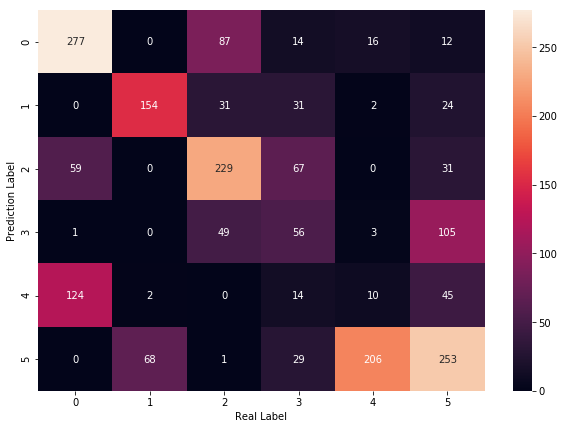

In [15]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [16]:
number_codes = [[0, 0, 0],
[0, 0, 1],
[0, 1, 0],
[0, 1, 1],
[1, 0, 0],
[1, 0, 1]]

In [26]:
matrix_errors = []

for i in range(5):
    for j in range(i+1,6):
        matrix_errors.append(3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.mean(matrix_errors)        

1.6666666666666667

In [20]:
number_codes[5]

[1, 0, 1]